Initial setup

In [1]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

Searching for active subspace methods, plotting keyword and publication trend

In [3]:
active = wosis.keyword_matches(RC, ['active subspace', 'activity scores'], threshold=95.0)

In [4]:
all_active = active.combine_recs()

In [5]:
act_df = wosis.rc_to_df(all_active)
act_df.to_csv('{}/active_subspaces_papers.csv'.format(DATA_DIR))

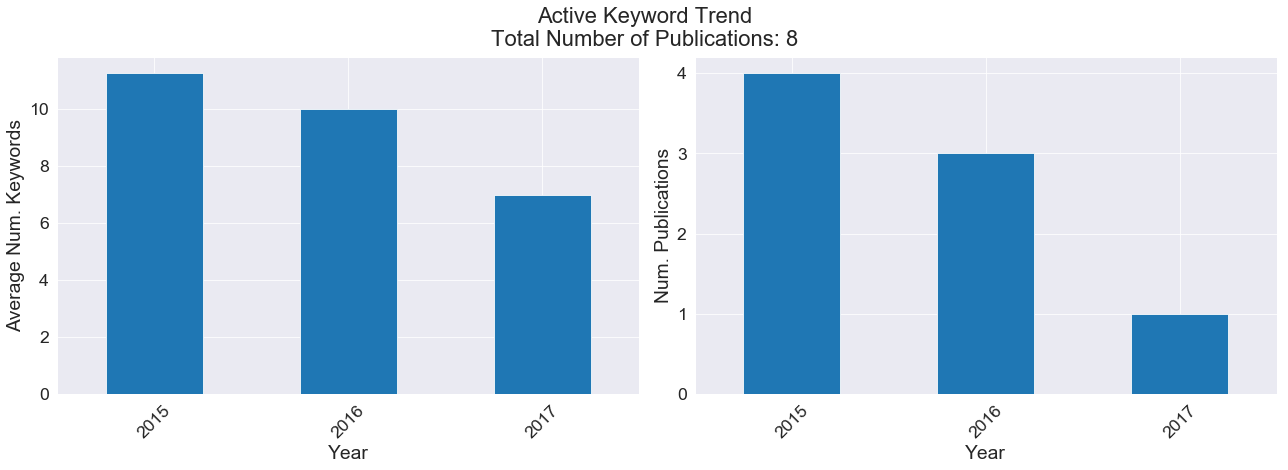

In [6]:
wos_plot.plot_kw_trend(all_active, title='Active Keyword Trend', save_plot_fn='{}/active_kw_trend.png'.format(FIG_DIR))

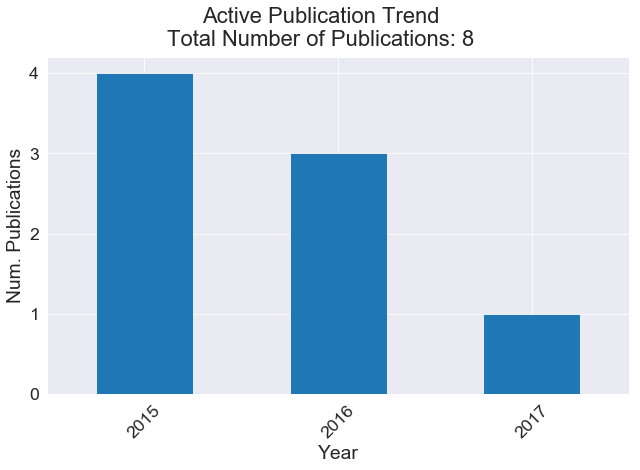

In [7]:
wos_plot.plot_pub_trend(all_active, title='Active Publication Trend', 
                        save_plot_fn='{}/active_pub_trend.png'.format(FIG_DIR))

<hr> Topic trend (active subspaces)

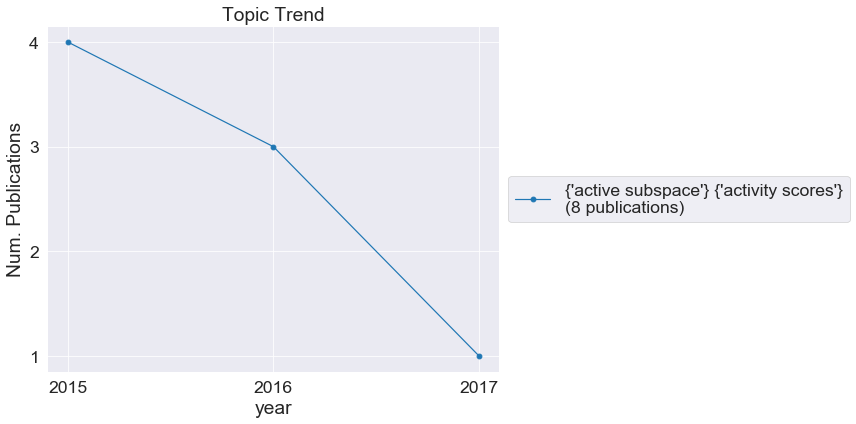

In [8]:
wos_plot.plot_topic_trend([all_active], save_plot_fn='{}/active_topic_trend.png'.format(FIG_DIR))

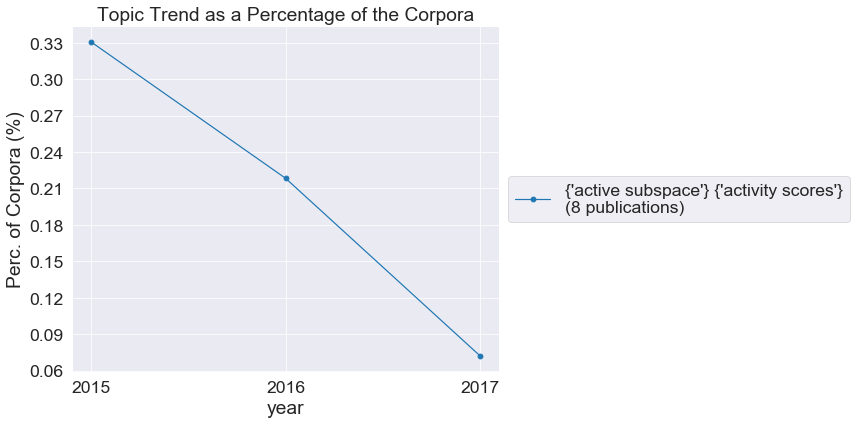

In [9]:
wos_plot.plot_topic_trend([all_active], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', 
                          save_plot_fn='{}/active_topic_trend_percentage.png'.format(FIG_DIR))

In [10]:
active_citations = wosis.get_num_citations(all_active, WOS_CONFIG)

Authenticated (SID: 7BfwZ5R6egrMEAZkbVl)


In [11]:
wosis.calc_average_citations(active_citations)

,id,year,title,keywords,abstract,copyright,AU,SO,DE,DOI,citations,Avg. Citations
0,WOS:000364256100001,2015,Exploiting active subspaces to quantify uncert...,DIFFERENTIAL-EQUATIONS THERMAL CHOKING FLOWS M...,We present a computational analysis of the rea...,(C) 2015 Elsevier Inc. All rights reserved.,"Constantine, PG|Emory, M|Larsson, J|Iaccarino, G",JOURNAL OF COMPUTATIONAL PHYSICS,uncertainty quantification active subspace hyp...,10.1016/j.jcp.2015.09.001,23,7.67
1,WOS:000361400900014,2015,Active subspaces for sensitivity analysis and ...,COMMON LAND MODEL SURFACE PARAMETERS ENERGY FL...,Integrated hydrologic models coupled to land s...,Elsevier Ltd. All rights reserved.,"Jefferson, JL|Gilbert, JM|Constantine, PG|Maxw...",COMPUTERS & GEOSCIENCES,active subspaces dimension reduction energy fl...,10.1016/j.cageo.2015.07.001,16,5.33
2,WOS:000380750500010,2016,Gaussian processes with built-in dimensionalit...,PARTIAL LEAST-SQUARES BLACK-BOX FUNCTIONS MONT...,"Uncertainty quantification (UQ) tasks, such as...",(C) 2016 Elsevier Inc. All rights reserved.,"Tripathy, R|Bilionis, I|Gonzalez, M",JOURNAL OF COMPUTATIONAL PHYSICS,active subspace uncertainty quantification gau...,10.1016/j.jcp.2016.05.039,14,7.00
3,WOS:000384077600022,2016,Stability analysis of thermo-acoustic nonlinea...,AZIMUTHAL THERMOACOUSTIC MODES PROPAGATION,Monte Carlo and Active Subspace Identification...,(C) 2016 Elsevier Inc. All rights reserved.,"Magri, L|Bauerheim, M|Nicoud, F|Juniper, MP",JOURNAL OF COMPUTATIONAL PHYSICS,thermo-acoustic stability uncertainty quantifi...,10.1016/j.jcp.2016.08.043,12,6.00
4,WOS:000363467100002,2015,Discovering an active subspace in a single-dio...,SENSITIVITY-ANALYSIS,Predictions from science and engineering model...,,"Constantine, PG|Zaharatos, B|Campanelli, M",STATISTICAL ANALYSIS AND DATA MINING,single-diode solar cell model active subspaces...,10.1002/sam.11281,9,3.00
5,WOS:000374807600008,2016,Reprint of: Active subspaces for sensitivity a...,COMMON LAND MODEL SURFACE PARAMETERIZATION SCH...,Integrated hydrologic models coupled to land s...,Elsevier Ltd. All rights reserved.,"Jefferson, JL|Gilbert, JM|Constantine, PG|Maxw...",COMPUTERS & GEOSCIENCES,active subspaces dimension reduction energy fl...,10.1016/j.cageo.2015.11.002,5,2.50
6,WOS:000352701700003,2015,A GRADIENT-BASED SAMPLING APPROACH FOR DIMENSI...,RANDOM INPUT DATA COLLOCATION METHOD SPARSE IN...,We develop a projection-based dimension reduct...,,"Stoyanov, M|Webster, CG",INTERNATIONAL JOURNAL FOR UNCERTAINTY QUANTIFI...,representation of uncertainty stochastic model...,10.1615/Int.J.UncertaintyQuantification.201401...,3,1.00
7,WOS:000411183600001,2017,Time-dependent global sensitivity analysis wit...,DIMENSION REDUCTION REGRESSION CELLS UNCERTAIN...,Renewable energy researchers use computer simu...,,"Constantine, PG|Doostan, A",STATISTICAL ANALYSIS AND DATA MINING,computer experiments sufficient dimension redu...,10.1002/sam.11347,1,1.00


Searching for variogram methods, plotting keyword and publication trend

In [12]:
var = wosis.keyword_matches(RC, ['variogram sensitivity', 'variogram analysis', 'analysis with variogram', 
                                 'analysis variogram', 'variogram-based'], threshold=100.0)

In [13]:
all_var = var.combine_recs()

In [14]:
var_df = wosis.rc_to_df(all_var)
var_df.to_csv('{}/variogram_papers.csv'.format(DATA_DIR))

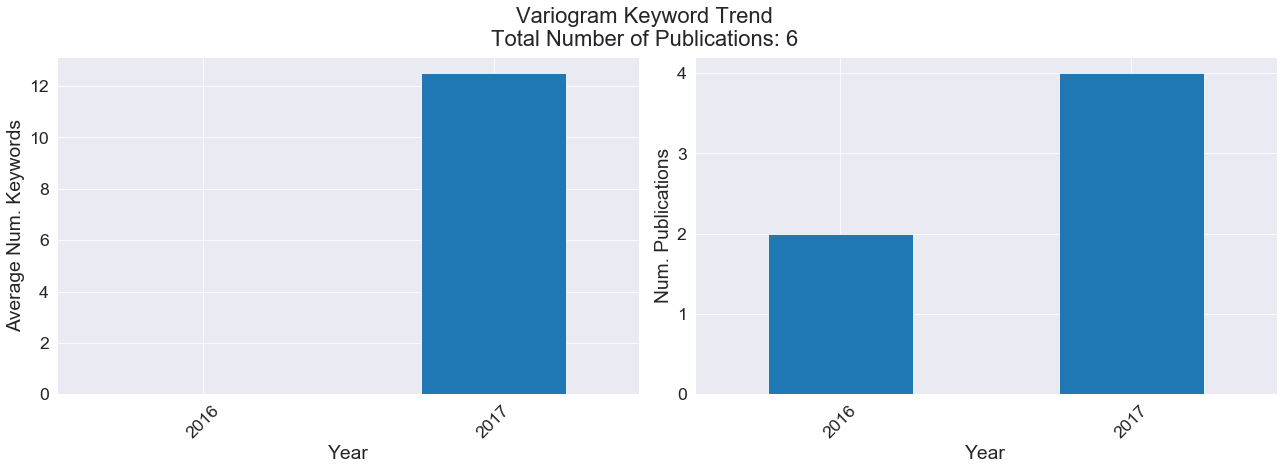

In [15]:
wos_plot.plot_kw_trend(all_var, title='Variogram Keyword Trend', save_plot_fn='{}/var_kw_trend.png'.format(FIG_DIR))

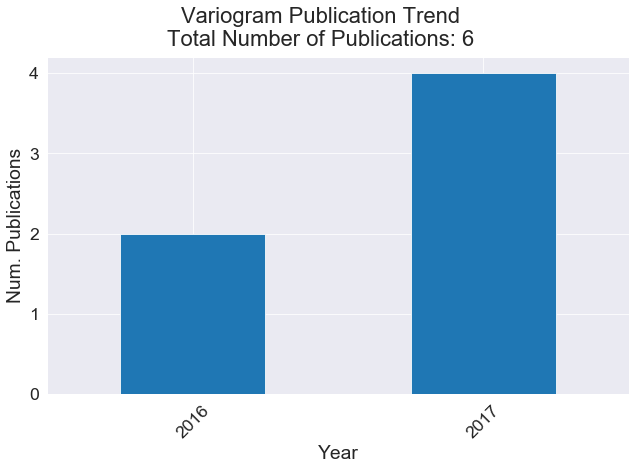

In [16]:
wos_plot.plot_pub_trend(all_var, title='Variogram Publication Trend', save_plot_fn='{}/var_pub_trend.png'.format(FIG_DIR))

<hr> Topic trend (variogram methods)

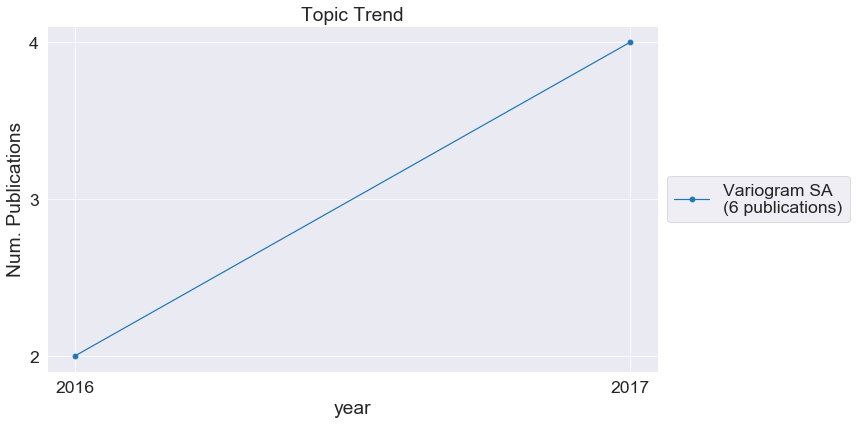

In [17]:
all_var.name='Variogram SA'
wos_plot.plot_topic_trend([all_var], save_plot_fn='{}/var_topic_trend.png'.format(FIG_DIR))

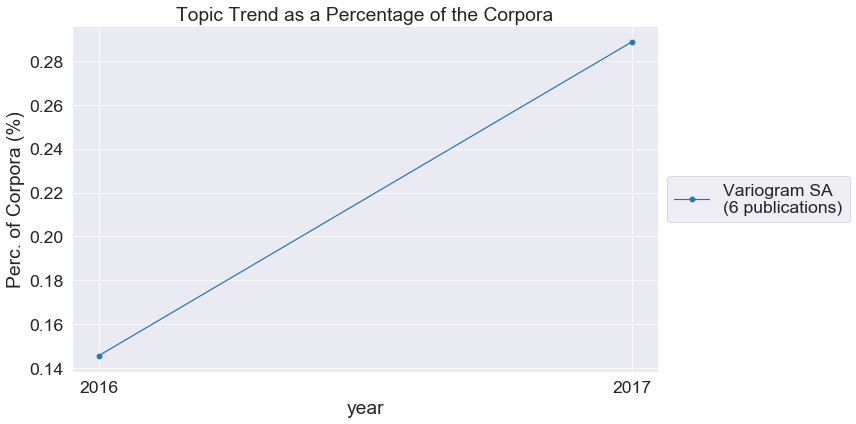

In [18]:
wos_plot.plot_topic_trend([all_var], total_rc=RC, title='Topic Trend as a Percentage of the Corpora', 
                          save_plot_fn='{}/var_topic_trend_percentage.png'.format(FIG_DIR))

In [19]:
var_citations = wosis.get_num_citations(all_var, WOS_CONFIG)

Authenticated (SID: 7C4yFqN9qKFb4mQg2Jl)


In [20]:
var_citations

,id,year,title,keywords,abstract,copyright,AU,SO,DE,DOI,citations
0,WOS:000373117800025,2016,"A new framework for comprehensive, robust, and...",MODELS,Computer simulation models are continually gro...,,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,,10.1002/2015WR017558,27
1,WOS:000373117800026,2016,"A new framework for comprehensive, robust, and...",MODELS,Based on the theoretical framework for sensiti...,,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,,10.1002/2015WR017559,23
2,WOS:000408341800002,2017,Enhanced identification of a hydrologic model ...,LAND-SURFACE SCHEME GLOBAL SENSITIVITY PARAMET...,Hydrologic model development and calibration h...,,"Yassin, F|Razavi, S|Wheater, H|Sapriza-Azuri, ...",HYDROLOGICAL PROCESSES,grace model state variable multiobjective opti...,10.1002/hyp.11267,9
3,WOS:000406177500010,2017,Insights into sensitivity analysis of Earth an...,LATIN HYPERCUBE DESIGNS GLOBAL SENSITIVITY HYD...,This paper investigates the commonly overlooke...,Elsevier Ltd. All rights reserved.,"Haghnegahdar, A|Razavi, S",ENVIRONMENTAL MODELLING & SOFTWARE,sensitivity analysis perturbation scale vars e...,10.1016/j.envsoft.2017.03.031,8
4,WOS:000418406900001,2017,Multicriteria sensitivity analysis as a diagno...,LAND-SURFACE SCHEME SEMIDISTRIBUTED HYDROLOGIC...,Complex hydrological models are being increasi...,,"Haghnegahdar, A|Razavi, S|Yassin, F|Wheater, H",HYDROLOGICAL PROCESSES,class hydrological modelling land surface mode...,10.1002/hyp.11358,7
5,WOS:000416711800002,2017,Improved Understanding of River Ice Processes ...,ENVIRONMENTAL SYSTEMS MODELS FRAMEWORK ROBUST ...,The high impact of river ice phenomena on the ...,(C) 2017 American Society of Civil Engineers.,"Sheikholeslami, R|Yassin, F|Lindenschmidt, KE|...",JOURNAL OF HYDROLOGIC ENGINEERING,cold regions river ice modeling ice-induced fl...,10.1061/(ASCE)HE.1943-5584.0001574,4


In [21]:
wosis.calc_average_citations(var_citations)

,id,year,title,keywords,abstract,copyright,AU,SO,DE,DOI,citations,Avg. Citations
0,WOS:000373117800025,2016,"A new framework for comprehensive, robust, and...",MODELS,Computer simulation models are continually gro...,,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,,10.1002/2015WR017558,27,13.5
1,WOS:000373117800026,2016,"A new framework for comprehensive, robust, and...",MODELS,Based on the theoretical framework for sensiti...,,"Razavi, S|Gupta, HV",WATER RESOURCES RESEARCH,,10.1002/2015WR017559,23,11.5
2,WOS:000408341800002,2017,Enhanced identification of a hydrologic model ...,LAND-SURFACE SCHEME GLOBAL SENSITIVITY PARAMET...,Hydrologic model development and calibration h...,,"Yassin, F|Razavi, S|Wheater, H|Sapriza-Azuri, ...",HYDROLOGICAL PROCESSES,grace model state variable multiobjective opti...,10.1002/hyp.11267,9,9.0
3,WOS:000406177500010,2017,Insights into sensitivity analysis of Earth an...,LATIN HYPERCUBE DESIGNS GLOBAL SENSITIVITY HYD...,This paper investigates the commonly overlooke...,Elsevier Ltd. All rights reserved.,"Haghnegahdar, A|Razavi, S",ENVIRONMENTAL MODELLING & SOFTWARE,sensitivity analysis perturbation scale vars e...,10.1016/j.envsoft.2017.03.031,8,8.0
4,WOS:000418406900001,2017,Multicriteria sensitivity analysis as a diagno...,LAND-SURFACE SCHEME SEMIDISTRIBUTED HYDROLOGIC...,Complex hydrological models are being increasi...,,"Haghnegahdar, A|Razavi, S|Yassin, F|Wheater, H",HYDROLOGICAL PROCESSES,class hydrological modelling land surface mode...,10.1002/hyp.11358,7,7.0
5,WOS:000416711800002,2017,Improved Understanding of River Ice Processes ...,ENVIRONMENTAL SYSTEMS MODELS FRAMEWORK ROBUST ...,The high impact of river ice phenomena on the ...,(C) 2017 American Society of Civil Engineers.,"Sheikholeslami, R|Yassin, F|Lindenschmidt, KE|...",JOURNAL OF HYDROLOGIC ENGINEERING,cold regions river ice modeling ice-induced fl...,10.1061/(ASCE)HE.1943-5584.0001574,4,4.0
